<a href="https://colab.research.google.com/github/Sudhaganisrinidhi/B_20_1342/blob/main/smart_ecosystem_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("eco_smart_energy_dataset.csv")
print("Dataset shape:", df.shape)
print("\nPreview:\n", df.head())


Dataset shape: (5000, 7)

Preview:
    temperature   humidity  hour_of_day  appliance_usage  smart_meter_signal  \
0    27.483571  38.411829            7         4.506911                   0   
1    24.308678  39.496737            1         1.890698                   1   
2    28.238443  53.035609           17         1.017482                   0   
3    32.615149  44.313993           15         1.535069                   1   
4    23.829233  42.373149            9         0.801656                   0   

   eco_mode  high_consumption  
0         0                 0  
1         1                 0  
2         1                 0  
3         0                 1  
4         1                 0  


In [ ]:
X = df.drop(columns=["high_consumption"])
y = df["high_consumption"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)


In [ ]:
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print("\n Accuracy:", round(acc*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



 Accuracy: 93.0 %

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       785
           1       0.85      0.82      0.83       215

    accuracy                           0.93      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.93      0.93      0.93      1000


Confusion Matrix:
 [[754  31]
 [ 39 176]]


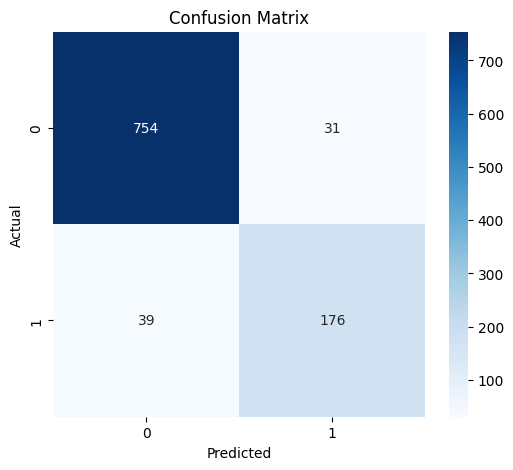

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()